INFO:__main__:All events parsed. Total number of events: 264395


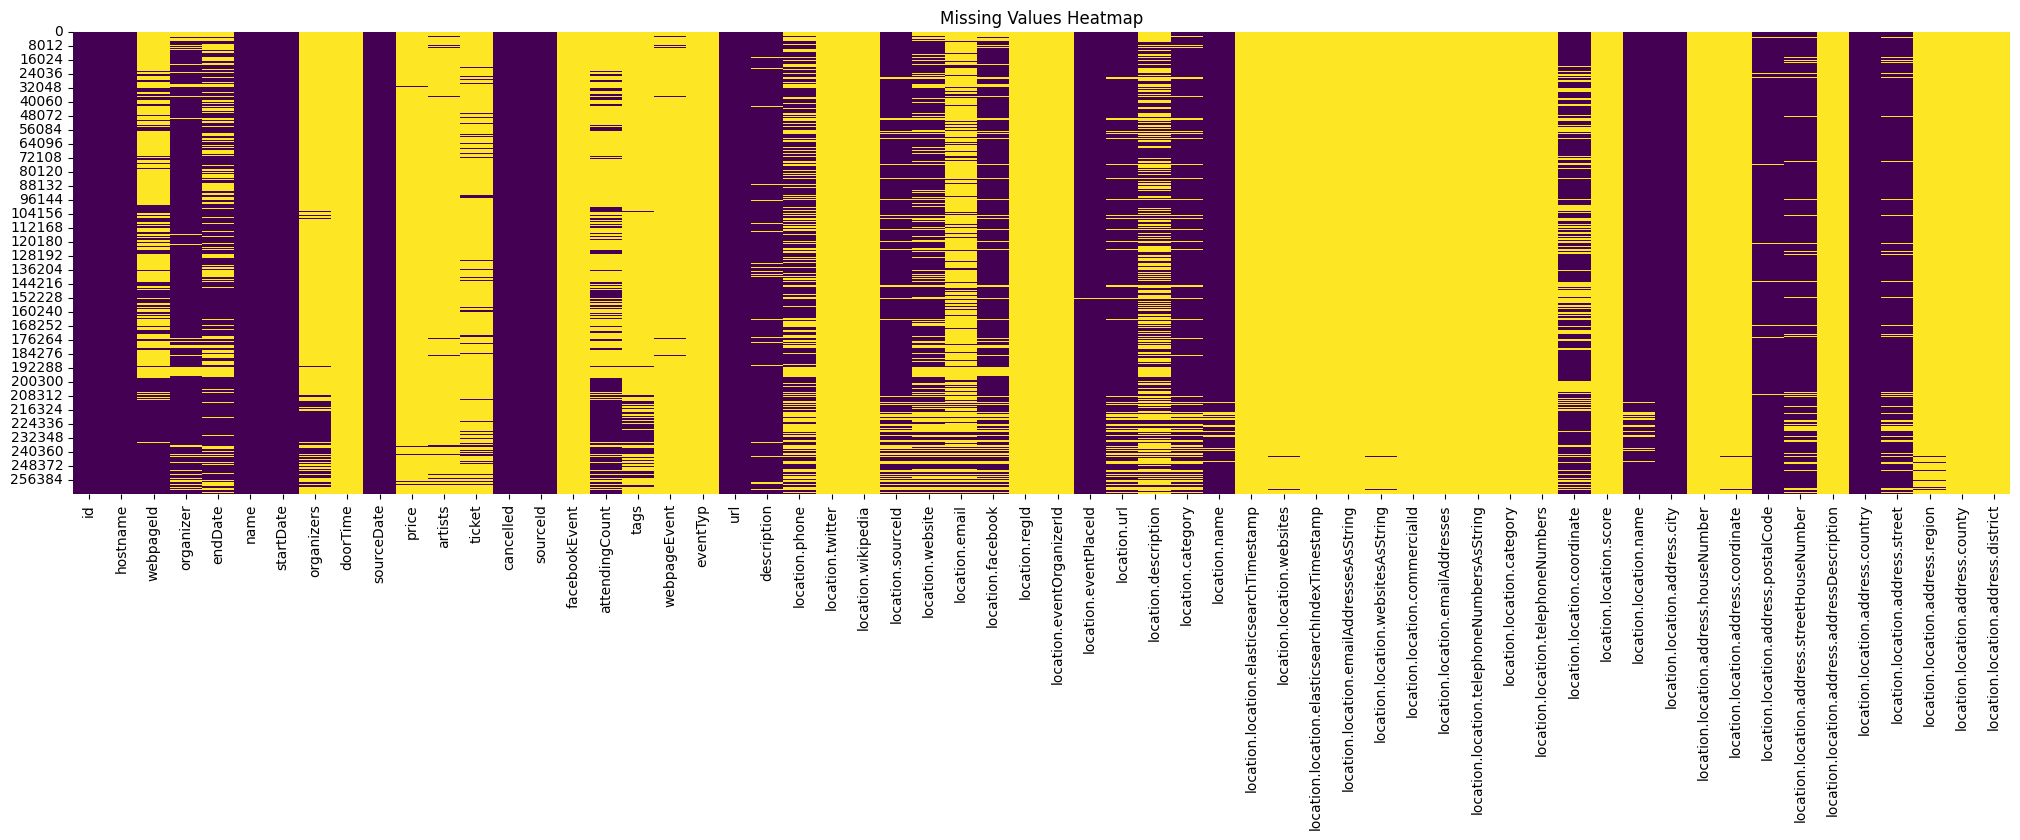

In [1]:
import json
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import ijson
import logging
import seaborn as sns
import numpy as np

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

#######################
# Parse Data and create DataFrame
#######################

def parse_json(file_path, num_events):
    with open(file_path, 'rb') as f:
        events = ijson.items(f, 'item')
        limited_events = [next(events) for _ in range(num_events)]
        logger.info('All events parsed. Total number of events: {}'.format(len(limited_events)))
        return limited_events


events = parse_json('stuttgart_events.json', 264395)

events_df = pd.DataFrame(events)
all_keys = set().union(*events_df["eventData"].apply(lambda x: x.keys()))
for key in all_keys:
    events_df[key] = events_df["eventData"].apply(lambda x: x.get(key, None))

keys_location = set().union(*events_df["location"].apply(lambda x: x.keys()))
for key in keys_location:
    events_df[f'location.{key}'] = events_df["location"].apply(lambda x: x.get(key, None))

keys_location_location = set().union(*events_df["location.location"].apply(lambda x: x.keys()))
for key in keys_location_location:
    events_df[f'location.location.{key}'] = events_df["location.location"].apply(lambda x: x.get(key, None))

keys_location_location_address = set().union(*events_df["location.location.address"].apply(lambda x: x.keys()))
for key in keys_location_location_address:
    events_df[f'location.location.address.{key}'] = events_df["location.location.address"].apply(lambda x: x.get(key, None))

#######################
# Data Cleaning
#######################
# delete dictionary columns
events_df = events_df.drop('eventData', axis=1)
events_df = events_df.drop('location', axis=1)
events_df = events_df.drop('location.location', axis=1)
events_df = events_df.drop('location.location.address', axis=1)

# Create a heatmap of missing values
plt.figure(figsize=(25, 6))  # Adjust the figure size as needed
sns.heatmap(events_df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()